#importing dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#lib


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib. pyplot as plt

#pre processing


## training img preprocessing


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/ds/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3116 files belonging to 36 classes.


#Validation Image Preprocessing


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/ds/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#building model


In [ ]:
cnn = tf.keras.models.Sequential()

#building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())


In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) #output layer

#compiling and training

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 585s 5s/step - loss: 6.0742 - accuracy: 0.0292 - val_loss: 3.5756 - val_accuracy: 0.0484
Epoch 2/32
98/98 [==============================] - 154s 1s/step - loss: 3.5730 - accuracy: 0.0369 - val_loss: 3.5451 - val_accuracy: 0.0513
Epoch 3/32
98/98 [==============================] - 153s 2s/step - loss: 3.5508 - accuracy: 0.0443 - val_loss: 3.4538 - val_accuracy: 0.0741
Epoch 4/32
98/98 [==============================] - 160s 2s/step - loss: 3.5404 - accuracy: 0.0494 - val_loss: 3.5615 - val_accuracy: 0.0627
Epoch 5/32
98/98 [==============================] - 146s 1s/step - loss: 3.4800 - accuracy: 0.0696 - val_loss: 3.4867 - val_accuracy: 0.0912
Epoch 6/32
98/98 [==============================] - 151s 1s/step - loss: 3.5503 - accuracy: 0.0488 - val_loss: 3.5279 - val_accuracy: 0.0484
Epoch 7/32
98/98 [==============================] - 155s 2s/step - loss: 3.4960 - accuracy: 0.0597 - val_loss: 3.4547 - val_accuracy: 0.0969
Epoch 8/32
98

#saving

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history

{'loss': [5.427034378051758,
  3.563258647918701,
  3.5090019702911377,
  3.3037641048431396,
  3.147965908050537,
  2.782043218612671,
  2.315600633621216,
  1.7625439167022705,
  1.4041550159454346,
  1.033496618270874,
  0.8905985355377197,
  0.6948541402816772,
  0.6077867746353149,
  0.4783601462841034,
  0.36144670844078064,
  0.32253167033195496,
  0.3197001814842224,
  0.2322000116109848,
  0.21633437275886536,
  0.21618491411209106,
  0.23204009234905243,
  0.15151914954185486,
  0.12263990938663483,
  0.10050787776708603,
  0.15645399689674377,
  0.1275855451822281,
  0.1276291459798813,
  0.22016482055187225,
  0.13327983021736145,
  0.13743291795253754,
  0.10507581382989883,
  0.12746325135231018],
 'accuracy': [0.039152760058641434,
  0.03947368264198303,
  0.05455712601542473,
  0.09595635533332825,
  0.13799743354320526,
  0.22496791183948517,
  0.33311939239501953,
  0.4897304177284241,
  0.5921052694320679,
  0.69608473777771,
  0.7551347613334656,
  0.809050083160400

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [ ]:
print (training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


 #Accuracy of Model Achieved on Validation set through percentage

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 95.72649598121643 %


#visual

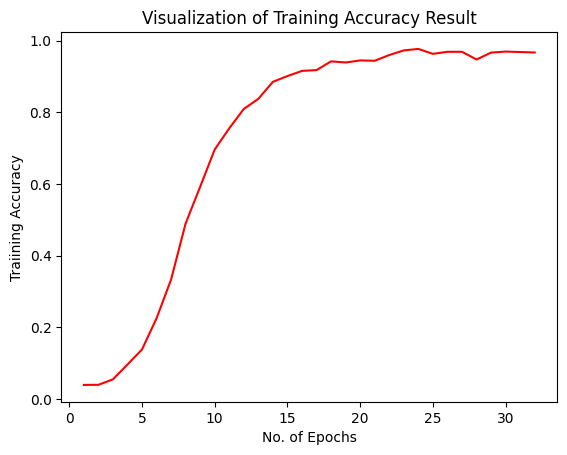

In [ ]:

epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

In [ ]:
#val accuracy

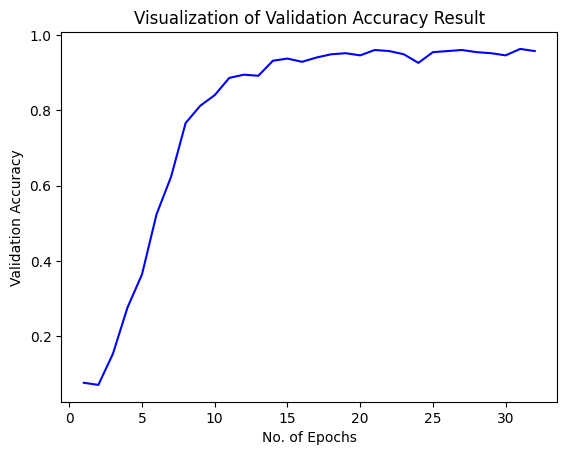

In [ ]:
  plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()
